In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("../scripts")
from TrackReconstruction_functions import *
%matplotlib widget

pd.options.mode.chained_assignment = None  # Disable the warning

pressure=1
diffusion="5.0percent"
# diffusion="nodiff"

Diff_smear, energy_threshold, diff_scale_factor, radius_sf, group_sf, Tortuosity_dist, voxel_size, det_half_length = InitializeParams(pressure, diffusion)

print("Diffussion smear is: ",        Diff_smear,            "mm/sqrt(cm)")
print("Energy threshold is: ",        1000*energy_threshold, "keV")
print("diffision scale factor is: ",  diff_scale_factor)
print("Radius scale factor is: ",     radius_sf)
print("Hit grouping factor is: ",     group_sf)
print("Tortuosity distance scale is:", Tortuosity_dist)
print("The voxel size is: ",           voxel_size)

file_id = "3023"

hits_true = pd.read_hdf(f"../data/ATPC_Bi/ATPC_Bi_ion_{pressure}bar_nexus_{file_id}.h5", "MC/hits")
parts_true = pd.read_hdf(f"../data/ATPC_Bi/ATPC_Bi_ion_{pressure}bar_nexus_{file_id}.h5", "MC/particles")

if (diffusion == "nodiff"):
    hits      = pd.read_hdf(f"../data/ATPC_Bi/ATPC_Bi_ion_{pressure}bar_Efilt_smear_{file_id}.h5", "MC/hits")
else:
    hits      = pd.read_hdf(f"../data/ATPC_Bi/ATPC_Bi_ion_{pressure}bar_Efilt_{diffusion}_smear_{file_id}.h5", "MC/hits")

event_list = hits.event_id.unique()
eid=event_list[6]
print(eid)
# eid = 90720000119

data = hits[hits.event_id ==eid]

data_true = hits_true[hits_true.event_id == eid]
data_true["z"] = data_true["z"]+det_half_length

data_parts = parts_true[parts_true.event_id == eid]
display(data_parts)

# print(hits.event_id.unique())

Diffussion smear is:  0.314 mm/sqrt(cm)
Energy threshold is:  0.2 keV
diffision scale factor is:  4
Radius scale factor is:  7
Hit grouping factor is:  5
Tortuosity distance scale is: 105.0
The voxel size is:  8
90720000013


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
64248,90720000119,1,Bi214,1,0,2505.652832,-1811.089600,1917.333740,0.000000,2505.652832,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
64249,90720000119,4,e-,0,1,2505.652832,-1811.089600,1917.333740,0.001118,2505.642578,...,0.274531,-0.256991,0.263374,0.000000,0.000000,-0.000000,0.175949,0.072843,RadioactiveDecay,eIoni
64250,90720000119,3,anti_nu_e,0,1,2505.652832,-1811.089600,1917.333740,0.001118,16547.029297,...,0.031032,0.228719,0.603515,0.031032,0.228719,0.603515,0.646147,292373.031250,RadioactiveDecay,Transportation
64251,90720000119,2,Po214[2447.702],0,1,2505.652832,-1811.089600,1917.333740,0.001118,2505.652832,...,-0.305563,0.028272,-0.866890,-0.000000,0.000000,-0.000000,0.000002,0.000000,RadioactiveDecay,RadioactiveDecay
64252,90720000119,6,gamma,0,2,2505.652832,-1811.089600,1917.333740,0.001118,1227.827759,...,-1.498985,-0.065098,-1.933902,-0.000000,-0.000000,0.000000,2.447687,4576.896973,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65057,90720000119,260,e-,0,7,1289.437744,-1847.206299,313.196930,6.741146,1289.497803,...,0.040523,0.039381,-0.000235,-0.000000,0.000000,0.000000,0.003115,0.208322,eIoni,eIoni
65058,90720000119,259,e-,0,7,1304.033203,-1859.339233,354.933594,6.584846,1304.026733,...,-0.034557,-0.001434,0.013485,0.000000,0.000000,0.000000,0.001347,0.105306,eIoni,eIoni
65059,90720000119,5,Po214,0,2,2505.652832,-1811.089600,1917.333740,0.001118,2505.652832,...,1.498986,0.065098,1.933903,0.000000,0.000000,0.000000,0.000015,0.000002,RadioactiveDecay,RadioactiveDecay
65060,90720000119,814,alpha,0,5,2505.652832,-1811.089600,1917.333740,388239.718750,2505.665527,...,163.369659,87.065750,-151.961197,0.000000,0.000000,-0.000000,7.686797,0.018569,RadioactiveDecay,ionIoni


In [459]:
mean_sigma = group_sf*Diff_smear*np.sqrt(0.1*data.z.median())
# mean_sigma = 12

# The expected diffusion is less than vox size so replace
if (mean_sigma < voxel_size+4):
    mean_sigma = voxel_size+4


print("mean_sigma:", mean_sigma)

mean_sigma: 26.90157318819849


In [460]:
reco_DE_event = data.copy()

print(len(reco_DE_event))

df_merged = GroupHits(reco_DE_event, mean_sigma)
df_merged_true = GroupHits(data_true, 8)

display(df_merged)


2499


,event_id,x,y,z,energy,group_id
91791,90720000119,452.830719,-883.169250,2592.0,0.000531,0
91792,90720000119,452.830719,-875.169250,2592.0,0.000336,0
91793,90720000119,460.830719,-899.169250,2592.0,0.000280,0
91794,90720000119,460.830719,-891.169250,2592.0,0.001259,0
91795,90720000119,460.830719,-883.169250,2592.0,0.000643,0
...,...,...,...,...,...,...
94285,90720000119,1228.830688,-1451.169312,4784.0,0.001007,4
94286,90720000119,1228.830688,-1443.169312,4784.0,0.001063,4
94287,90720000119,1228.830688,-1435.169312,4784.0,0.000308,4
94288,90720000119,1236.830688,-1451.169312,4784.0,0.000923,4


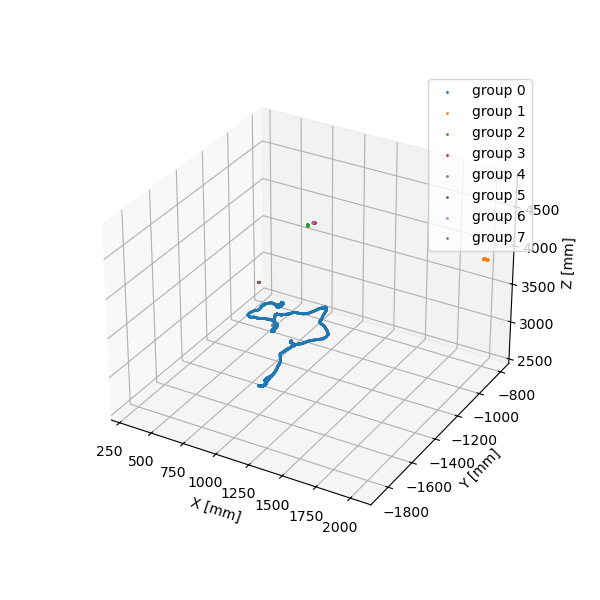

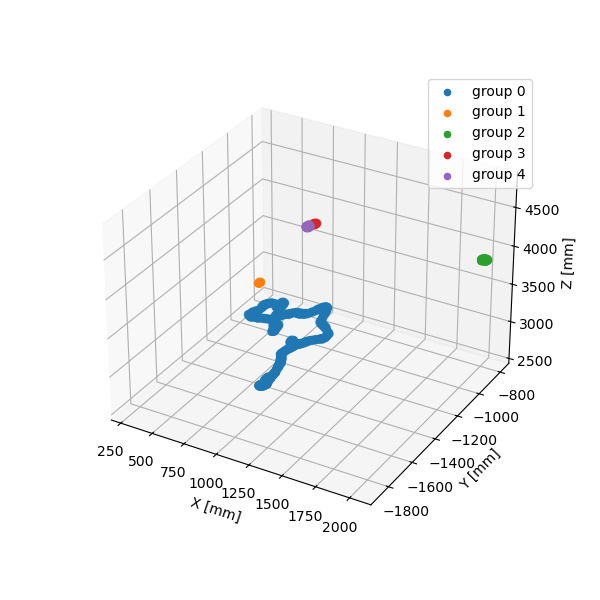

In [461]:

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, projection='3d')

for gid in sorted(df_merged_true["group_id"].unique()):
    temp_df = data_true[data_true.group_id == gid]
    ax1.scatter(temp_df['x'], temp_df['y'], temp_df['z'], label = f"group {gid}", s = 1)

# ax1.scatter(data['x'], data['y'], data['z'],c="k", s=0.1)
ax1.set_xlabel("X [mm]")
ax1.set_ylabel("Y [mm]")
ax1.set_zlabel("Z [mm]")
ax1.legend()


fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, projection='3d')
for gid in sorted(df_merged["group_id"].unique()):
    temp_df = df_merged[df_merged.group_id == gid]
    ax1.scatter(temp_df['x'], temp_df['y'], temp_df['z'],label = f"group {gid}")
    # ax1.scatter(data['x'], data['y'], data['z'],c="k", s=0.1)

    ax1.set_xlabel("X [mm]")
    ax1.set_ylabel("Y [mm]")
    ax1.set_zlabel("Z [mm]")
    ax1.legend()
# plt.savefig(f"../../../Projects/Atmospheric TPC/Technical Note/Images/GroupedHits.pdf")

In [456]:
group_diff1 = []
group_diff2 = []



for eid in hits.event_id.unique():
    data = hits[hits.event_id ==eid]
    data_true = hits_true[hits_true.event_id == eid]

    Diff_smear, energy_threshold, diff_scale_factor, radius_sf, group_sf, Tortuosity_dist, voxel_size, det_half_length = InitializeParams(pressure, diffusion)

    mean_sigma = group_sf*Diff_smear*np.sqrt(0.1*data.z.median())
    if (mean_sigma < voxel_size):
        mean_sigma = voxel_size+1
    # print(group_sf, Diff_smear, mean_sigma)

    df_merged = GroupHits(data, mean_sigma)
    df_merged_true = GroupHits(data_true, mean_sigma)
    df_merged_true2 = GroupHits(data_true, 8)

    if ((len(df_merged.group_id.unique()) - len(df_merged_true.group_id.unique())) > 2):
        print(eid)

    # print(eid, len(df_merged.group_id.unique()), len(df_merged_true.group_id.unique()), len(df_merged_true2.group_id.unique()))
    group_diff1.append( (len(df_merged.group_id.unique()) - len(df_merged_true.group_id.unique()))/  1 )
    group_diff2.append( (len(df_merged.group_id.unique()) - len(df_merged_true2.group_id.unique()))/ 1 )
    break

group_diff1 = []
group_diff2 = []



for eid in hits.event_id.unique():
    data = hits[hits.event_id ==eid]
    data_true = hits_true[hits_true.event_id == eid]

    Diff_smear, energy_threshold, diff_scale_factor, radius_sf, group_sf, Tortuosity_dist, voxel_size, det_half_length = InitializeParams(pressure, diffusion)

    mean_sigma = group_sf*Diff_smear*np.sqrt(0.1*data.z.median())
    if (mean_sigma < voxel_size+4):
        mean_sigma = voxel_size+4
    # print(group_sf, Diff_smear, mean_sigma)

    df_merged = GroupHits(data, mean_sigma)
    df_merged_true = GroupHits(data_true, mean_sigma)
    df_merged_true2 = GroupHits(data_true, 8)

    if ((len(df_merged.group_id.unique()) - len(df_merged_true.group_id.unique())) < -2):
        print(eid)

    # print(eid, len(df_merged.group_id.unique()), len(df_merged_true.group_id.unique()), len(df_merged_true2.group_id.unique()))
    group_diff1.append( (len(df_merged.group_id.unique()) - len(df_merged_true.group_id.unique())) )
    group_diff2.append( (len(df_merged.group_id.unique()) - len(df_merged_true2.group_id.unique())))
    # break


90720000119
90720000241
90720000439


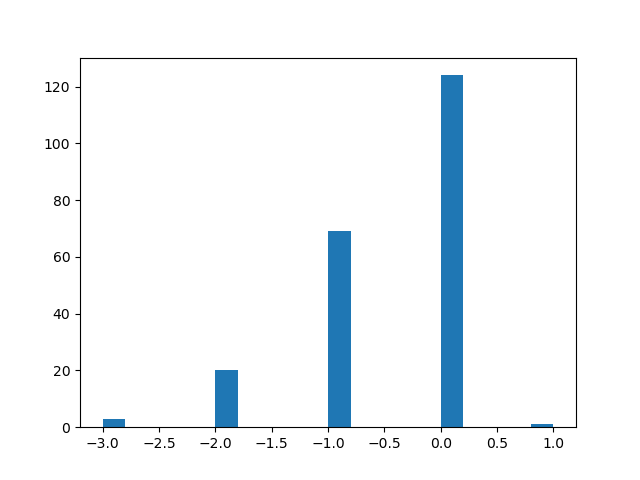

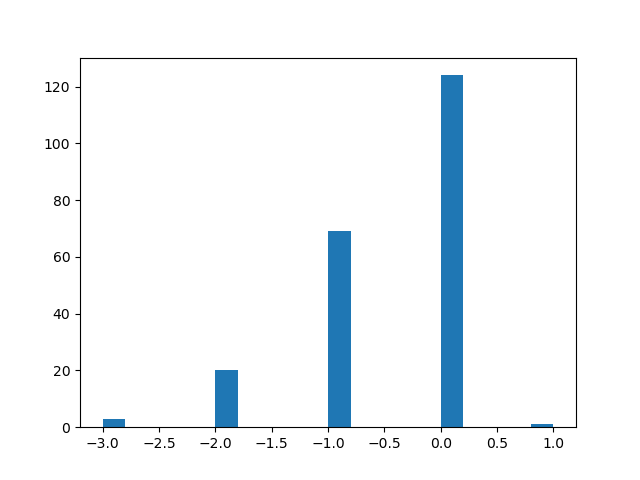

In [457]:
plt.figure()
plt.hist(group_diff1, bins = 20);
plt.figure()
plt.hist(group_diff2, bins = 20);